In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
%matplotlib inline 

In [77]:
import os

DATASET = 'dataset/Edge-IIoTset-dataset'
datasets_locations = []
for path, dirs, files in os.walk(DATASET):
    for file in files:
        if file.endswith('csv'):
            loc = f'{path}/{file}'
            if 'Selected dataset for ML and DL' not in loc:
                datasets_locations.append(loc)
                print(f'{loc}')


dataset/Edge-IIoTset-dataset\Attack traffic/Backdoor_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/DDoS_HTTP_Flood_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/DDoS_ICMP_Flood_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/DDoS_UDP_Flood_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/MITM_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/OS_Fingerprinting_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/Password_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/Port_Scanning_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/Ransomware_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/SQL_injection_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/Uploading_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/Vulnerability_scanner_attack.csv
dataset/Edge-IIoTset-dataset\Attack traffic/XSS_attack.csv
dataset/Edge-IIoTset-dataset\Normal traffic\Dist

``` bash
#!/bin/bash

# Find all files with a ".csv" extension in the current directory and its subdirectories
find ./ -type f -name "*.csv" | while read file; do
    # Count the number of lines in each file
    lines=$(wc -l < "$file")
    # Print the file path and its line count
    echo "$file has $lines lines"
done
```

```
./Attack traffic/Backdoor_attack.csv has 24863 lines
./Attack traffic/DDoS_HTTP_Flood_attack.csv has 229023 lines
./Attack traffic/DDoS_ICMP_Flood_attack.csv has 2914355 lines
./Attack traffic/DDoS_TCP_SYN_Flood_attack.csv has 2020121 lines
./Attack traffic/DDoS_UDP_Flood_attack.csv has 3201627 lines
./Attack traffic/MITM_attack.csv has 1230 lines
./Attack traffic/OS_Fingerprinting_attack.csv has 1002 lines
./Attack traffic/Password_attack.csv has 1053386 lines
./Attack traffic/Port_Scanning_attack.csv has 22565 lines
./Attack traffic/Ransomware_attack.csv has 10926 lines
./Attack traffic/SQL_injection_attack.csv has 51204 lines
./Attack traffic/Uploading_attack.csv has 37635 lines
./Attack traffic/Vulnerability_scanner_attack.csv has 145870 lines
./Attack traffic/XSS_attack.csv has 15916 lines
./Normal traffic/Distance/Distance.csv has 1143541 lines
./Normal traffic/Flame_Sensor/Flame_Sensor.csv has 1070197 lines
./Normal traffic/Heart_Rate/Heart_Rate.csv has 165320 lines
./Normal traffic/IR_Receiver/IR_Receiver.csv has 1307779 lines
./Normal traffic/Modbus/Modbus.csv has 159503 lines
./Normal traffic/phValue/phValue.csv has 746909 lines
./Normal traffic/Soil_Moisture/Soil_Moisture.csv has 1192778 lines
./Normal traffic/Sound_Sensor/Sound_Sensor.csv has 1512884 lines
./Normal traffic/Temperature_and_Humidity/Temperature_and_Humidity.csv has 1615723 lines
./Normal traffic/Water_Level/Water_Level.csv has 2295289 lines
./Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv has 2219202 lines
./Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv has 157801 lines
```

In [20]:
import importlib
import ids_common
importlib.reload(ids_common)

<module 'ids_common' from 'd:\\stuff\\univ\\ids\\ids_common.py'>

In [13]:
path_to_dataset = './dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'

df = pd.read_csv(path_to_dataset, low_memory=False)
ids_common.ferrag_preparation(df, verbose=True)

Before: shape=(157800, 63)
Before: dropna: NA: 0, DUPS: 5604
After: dropna: NA: 0, DUPS: 0
After: shape=(152196, 48)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152196 entries, 0 to 157798
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 152196 non-null  float64
 1   arp.hw.size                152196 non-null  float64
 2   icmp.checksum              152196 non-null  float64
 3   icmp.seq_le                152196 non-null  float64
 4   icmp.unused                152196 non-null  float64
 5   http.content_length        152196 non-null  float64
 6   http.request.method        152196 non-null  object 
 7   http.referer               152196 non-null  object 
 8   http.request.version       152196 non-null  object 
 9   http.response              152196 non-null  float64
 10  http.tls_port              152196 non-null  float64
 11  tcp.ack                    152196 non-null  float64
 12  tcp.ack_raw                152196 non-null  float64
 13  tcp.checksum               152196 

In [29]:
stats = []
for col in ids_common.to_drop_1_unique:
    uniques = df[col].unique()
    num_uniques = len(uniques)
    stats.append((col, df[col].dtype, num_uniques))

num_rows = df.shape[0]
for i, sts in enumerate(sorted(stats, key=lambda x: x[2])):
    col, val_type, num_uniq = sts
    dropped = '------------'
    print(f'{i:<4}{col:<32}{str(val_type):<12}{num_uniq:>6} [{dropped:^24}]')

    if num_uniq < 10:
        # val_count = df[c].value_counts().sort_values()
        val_count = df.groupby('Attack_label')[col].value_counts().div(num_rows)
        print(val_count)
    print('-'*80)

0   icmp.unused                     float64          1 [      ------------      ]
Attack_label  icmp.unused
0             0.0            0.158355
1             0.0            0.841645
Name: count, dtype: float64
--------------------------------------------------------------------------------
1   http.tls_port                   float64          1 [      ------------      ]
Attack_label  http.tls_port
0             0.0              0.158355
1             0.0              0.841645
Name: count, dtype: float64
--------------------------------------------------------------------------------
2   dns.qry.type                    float64          1 [      ------------      ]
Attack_label  dns.qry.type
0             0.0             0.158355
1             0.0             0.841645
Name: count, dtype: float64
--------------------------------------------------------------------------------
3   dns.retransmit_request_in       float64          1 [      ------------      ]
Attack_label  dns.retransmit_r

In [ ]:
stats = []
for col in ids_common.to_drop_1_unique:
    uniques = df[col].unique()
    num_uniques = len(uniques)
    stats.append((col, df[col].dtype, num_uniques))

num_rows = df.shape[0]
for i, sts in enumerate(sorted(stats, key=lambda x: x[2])):
    col, val_type, num_uniq = sts
    dropped = '------------'
    print(f'{i:<4}{col:<32}{str(val_type):<12}{num_uniq:>6} [{dropped:^24}]')

    if num_uniq < 10:
        # val_count = df[c].value_counts().sort_values()
        val_count = df.groupby('Attack_label')[col].value_counts().div(num_rows)
        print(val_count)
    print('-'*80)

In [ ]:
print(ids_common.to_drop_1_unique)

stats = dict()

for ds_path in datasets_locations:
    print(f'{ds_path}')
    
    ds_stats = dict()

    ddf = pd.read_csv(ds_path, low_memory=False)
    for col in ddf.columns:
        if col in ids_common.dropped_by_ferrag:
            continue
        
        uniques = ddf[col].unique()
        num_uniq = len(uniques)
        vc = '[too many]'
        if num_uniq < 16:
            vc = ddf[col].value_counts()
        else:
            uniques = uniques[:8] + uniques[-8:]

        ds_stats[col] = (num_uniq, uniques, vc)
        
    stats[ds_path] = ds_stats
    # num_rows = ddf.shape[0]
    # for i, sts in enumerate(sorted(stats, key=lambda x: x[2])):
        
    #     col, val_type, num_uniq = sts
        
    #     dropped = '------------'
    #     print(f'{i:<4}{col:<32}{str(val_type):<12}{num_uniq:>6} [{dropped:^24}]')
    #     # val_count = ddf[c].value_counts().sort_values()
    #     if num_uniq < 10:
    #         val_count = ddf.groupby('Attack_label')[col].value_counts().div(num_rows)
    #         print(val_count)
    #         print('-'*80)


In [70]:
for ds_path, sts in stats.items():
    _, f = os.path.split(ds_path)
    print(f)
    for col, uniques in sts.items():
        num, unqs, gr = uniques
        pr = '*' if num != 1 else ''

        print(f'{pr}\t{col} {num} {unqs}')
        print(f'\t{gr}')
        print()
    print('-'*80)

Backdoor_attack.csv
*	arp.opcode 3 [0. 1. 2.]
	arp.opcode
0.0    24538
1.0      162
2.0      162
Name: count, dtype: int64

*	arp.hw.size 2 [0. 6.]
	arp.hw.size
0.0    24538
6.0      324
Name: count, dtype: int64

	icmp.checksum 1 [0.]
	icmp.checksum
0.0    24862
Name: count, dtype: int64

	icmp.seq_le 1 [0.]
	icmp.seq_le
0.0    24862
Name: count, dtype: int64

	icmp.unused 1 [0.]
	icmp.unused
0.0    24862
Name: count, dtype: int64

	http.content_length 1 [0.]
	http.content_length
0.0    24862
Name: count, dtype: int64

	http.request.method 1 [0.]
	http.request.method
0.0    24862
Name: count, dtype: int64

	http.referer 1 [0.]
	http.referer
0.0    24862
Name: count, dtype: int64

	http.request.version 1 [0.]
	http.request.version
0.0    24862
Name: count, dtype: int64

	http.response 1 [0.]
	http.response
0.0    24862
Name: count, dtype: int64

	http.tls_port 1 [0.]
	http.tls_port
0.0    24862
Name: count, dtype: int64

*	tcp.ack 10781 [2435314. 2437250. 2435937. 2438386. 2439058. 243

In [ ]:
DROP = 'DROP'
TARGET = 'TARGET'
UNKNOWN = 'UNKNOWN'
SINGLE_VAL = 'SINGLE_VAL'
FIX_0 = 'FIX_0'
TO_CAT = 'TO_CAT'
TO_NUM = 'TO_NUM'
TO_BOOL = 'TO_BOOL'

feature_actions = {
        'frame.time' : [DROP],
        'ip.src_host' : [DROP],
        'ip.dst_host' : [DROP],
        'arp.dst.proto_ipv4' : [DROP],
        'arp.opcode' : [TO_NUM],
        'arp.hw.size' : [TO_NUM],
        'arp.src.proto_ipv4' : [DROP],
        'icmp.checksum' : [TO_NUM],
        'icmp.seq_le' : [TO_NUM],
        'icmp.transmit_timestamp' : [DROP],
        'icmp.unused' : [TO_CAT],
        'http.file_data' : [DROP], #
        'http.content_length' : [TO_NUM],
        'http.request.uri.query' : [DROP],
        'http.request.method': [TO_CAT],
        'http.referer': [TO_CAT],
        'http.request.full_uri': [DROP],
        'http.request.version': [TO_CAT],
        'http.response': [TO_BOOL],
        'http.tls_port': [TO_CAT],
        'tcp.ack': [TO_NUM],
        'tcp.ack_raw': [TO_NUM],
        'tcp.checksum': [TO_CAT],
        'tcp.connection.fin': [TO_CAT],
        'tcp.connection.rst': [TO_CAT],
        'tcp.connection.syn': [TO_CAT],
        'tcp.connection.synack': [TO_CAT],
        'tcp.dstport': [DROP], #
        'tcp.flags': [TO_NUM],
        'tcp.flags.ack': [TO_BOOL],
        'tcp.len': [TO_NUM],
        'tcp.options': [DROP], #
        'tcp.payload': [DROP], #
        'tcp.seq': [TO_NUM],
        'tcp.srcport': [DROP],
        'udp.port': [DROP],
        'udp.stream': [TO_NUM],
        'udp.time_delta': [TO_NUM],
        'dns.qry.name': [TO_CAT],
        'dns.qry.name.len': [TO_NUM], #[FIX_0, TO_CAT],
        'dns.qry.qu': [TO_BOOL],
        'dns.qry.type': [TO_NUM],
        'dns.retransmission': [TO_BOOL],
        'dns.retransmit_request': [TO_CAT],
        'dns.retransmit_request_in': [TO_CAT],
        'mqtt.conack.flags': [TO_NUM],
        'mqtt.conflag.cleansess': [TO_BOOL, TO_CAT],
        'mqtt.conflags': [TO_NUM],
        'mqtt.hdrflags': [TO_NUM],
        'mqtt.len': [TO_NUM],
        'mqtt.msg_decoded_as': [TO_CAT],
        'mqtt.msg': [DROP], #
        'mqtt.msgtype': [TO_NUM],
        'mqtt.proto_len': [TO_NUM],
        'mqtt.protoname': [TO_CAT],
        'mqtt.topic': [TO_CAT],
        'mqtt.topic_len': [TO_NUM],
        'mqtt.ver': [TO_NUM],
        'mbtcp.len': [TO_NUM],
        'mbtcp.trans_id': [TO_NUM],
        'mbtcp.unit_id': [TO_NUM],
        'Attack_label': [TARGET],
        'Attack_type': [TARGET]
    }




In [75]:


sample_size_koefs = {
    'OS_Fingerprinting_attack.csv':1,
    'MITM_attack.csv':1,
    'Ransomware_attack.csv':1,
    'XSS_attack.csv':1,
    'Port_Scanning_attack.csv':1,
    'Backdoor_attack.csv':1,
    'Uploading_attack.csv':1,
    'SQL_injection_attack.csv':1,
    'Vulnerability_scanner_attack.csv':0.5,
    'DDoS_HTTP_Flood_attack.csv':0.5,
    'Password_attack.csv':0.25,
    'DDoS_TCP_SYN_Flood_attack.csv':0.25,
    'DDoS_ICMP_Flood_attack.csv':0.25,
    'DDoS_UDP_Flood_attack.csv':0.25,
    'Modbus.csv':0.5,
    'Heart_Rate.csv':0.5,
    'phValue.csv':0.3,
    'Flame_Sensor.csv':0.25,
    'Distance.csv':0.25,
    'Soil_Moisture.csv':0.25,
    'IR_Receiver.csv':0.25,
    'Sound_Sensor.csv':0.25,
    'Temperature_and_Humidity.csv':0.25,
    'Water_Level.csv':0.25
}



total_ds_size = 0
save_to = 'sampled_data/sample_0.1_OR_25k/'
for ds_path in datasets_locations:

    ds_stats = dict()

    ddf = pd.read_csv(ds_path, low_memory=False)
    _, f = os.path.split(ds_path)
    

    rows = ddf.shape[0]
    k=1000
    sample_size = rows
    if 50*k < rows:
        # ddf = ddf.sample(min(rows*0.6))
        sample_size = int(rows*0.1)
    # elif 100*k < rows <= 500*k:
    #     # ddf = ddf.sample(min(rows*0.1))
    #     sample_size = rows*0.8
    print(f'{f}\t{ddf.shape} {sample_size}')
    total_ds_size += sample_size

Backdoor_attack.csv	(24862, 63) 24862
DDoS_HTTP_Flood_attack.csv	(229022, 63) 22902.2
DDoS_ICMP_Flood_attack.csv	(2914354, 63) 291435.4
DDoS_TCP_SYN_Flood_attack.csv	(2020120, 63) 202012.0
DDoS_UDP_Flood_attack.csv	(3201626, 63) 320162.60000000003
MITM_attack.csv	(1229, 63) 1229
OS_Fingerprinting_attack.csv	(1001, 63) 1001
Password_attack.csv	(1053385, 63) 105338.5
Port_Scanning_attack.csv	(22564, 63) 22564
Ransomware_attack.csv	(10925, 63) 10925
SQL_injection_attack.csv	(51203, 63) 5120.3
Uploading_attack.csv	(37634, 63) 37634
Vulnerability_scanner_attack.csv	(145869, 63) 14586.900000000001
XSS_attack.csv	(15915, 63) 15915
Distance.csv	(1143540, 63) 114354.0
Flame_Sensor.csv	(1070196, 63) 107019.6
Heart_Rate.csv	(165319, 63) 16531.9
IR_Receiver.csv	(1307778, 63) 130777.8
Modbus.csv	(159502, 63) 15950.2
phValue.csv	(746908, 63) 74690.8
Soil_Moisture.csv	(1192777, 63) 119277.70000000001
Sound_Sensor.csv	(1512883, 63) 151288.30000000002
Temperature_and_Humidity.csv	(1615722, 63) 161572.2

In [76]:
print(total_ds_size)

2434379.3000000003


In [71]:
ds_path = 'dataset/Edge-IIoTset-dataset\Attack traffic/Backdoor_attack.csv'

print(f'{ds_path}')

ds_stats = dict()

ddf = pd.read_csv(ds_path, low_memory=False)
print(ds_path, ddf.shape)
for col in ddf.columns:
    if col in ids_common.dropped_by_ferrag:
        continue
    
    uniques = ddf[col].unique()
    num_uniq = len(uniques)
    vc = '[too many]'
    if num_uniq < 16:
        vc = ddf[col].value_counts()
    else:
        uniques = uniques[:8] + uniques[-8:]

    ds_stats[col] = (num_uniq, uniques, vc)
        

for col, uniques in ds_stats.items():
    num, unqs, gr = uniques
    pr = '*' if num != 1 else ''

    print(f'{pr}\t{col} {num} {unqs}')
    print(f'\t{gr}')
    print()
print('-'*80)

dataset/Edge-IIoTset-dataset\Attack traffic/Backdoor_attack.csv
*	arp.opcode 3 [0. 1. 2.]
	arp.opcode
0.0    24538
1.0      162
2.0      162
Name: count, dtype: int64

*	arp.hw.size 2 [0. 6.]
	arp.hw.size
0.0    24538
6.0      324
Name: count, dtype: int64

	icmp.checksum 1 [0.]
	icmp.checksum
0.0    24862
Name: count, dtype: int64

	icmp.seq_le 1 [0.]
	icmp.seq_le
0.0    24862
Name: count, dtype: int64

	icmp.unused 1 [0.]
	icmp.unused
0.0    24862
Name: count, dtype: int64

	http.content_length 1 [0.]
	http.content_length
0.0    24862
Name: count, dtype: int64

	http.request.method 1 [0.]
	http.request.method
0.0    24862
Name: count, dtype: int64

	http.referer 1 [0.]
	http.referer
0.0    24862
Name: count, dtype: int64

	http.request.version 1 [0.]
	http.request.version
0.0    24862
Name: count, dtype: int64

	http.response 1 [0.]
	http.response
0.0    24862
Name: count, dtype: int64

	http.tls_port 1 [0.]
	http.tls_port
0.0    24862
Name: count, dtype: int64

*	tcp.ack 10781 [2435

In [72]:
sample_df = ddf.sample(n=10000)

for col in sample_df.columns:
    if col in ids_common.dropped_by_ferrag:
        continue
    
    uniques = sample_df[col].unique()
    num_uniq = len(uniques)
    vc = '[too many]'
    if num_uniq < 16:
        vc = sample_df[col].value_counts()
    else:
        uniques = uniques[:8] + uniques[-8:]

    ds_stats[col] = (num_uniq, uniques, vc)
        

for col, uniques in ds_stats.items():
    num, unqs, gr = uniques
    pr = '*' if num != 1 else ''

    print(f'{pr}\t{col} {num} {unqs}')
    print(f'\t{gr}')
    print()
print('-'*80)

*	arp.opcode 3 [0. 1. 2.]
	arp.opcode
0.0    9881
1.0      61
2.0      58
Name: count, dtype: int64

*	arp.hw.size 2 [0. 6.]
	arp.hw.size
0.0    9881
6.0     119
Name: count, dtype: int64

	icmp.checksum 1 [0.]
	icmp.checksum
0.0    10000
Name: count, dtype: int64

	icmp.seq_le 1 [0.]
	icmp.seq_le
0.0    10000
Name: count, dtype: int64

	icmp.unused 1 [0.]
	icmp.unused
0.0    10000
Name: count, dtype: int64

	http.content_length 1 [0.]
	http.content_length
0.0    10000
Name: count, dtype: int64

	http.request.method 1 [0.]
	http.request.method
0.0    10000
Name: count, dtype: int64

	http.referer 1 [0.]
	http.referer
0.0    10000
Name: count, dtype: int64

	http.request.version 1 [0.]
	http.request.version
0.0    10000
Name: count, dtype: int64

	http.response 1 [0.]
	http.response
0.0    10000
Name: count, dtype: int64

	http.tls_port 1 [0.]
	http.tls_port
0.0    10000
Name: count, dtype: int64

*	tcp.ack 4504 [1644898. 1660578. 2532642.  888706. 2021457. 2130178. 2618578. 3834546.]
	

In [58]:
def show_ds_stats(df):
    stats = []

    for col in df.columns:
        uniques = df[col].unique()
        num_uniques = len(uniques)
        stats.append((col, df[col].dtype, num_uniques))

    print(f'SHAPE: {df.shape}')

    num_rows = df.shape[0]

    for i, sts in enumerate(sorted(stats, key=lambda x: x[2])):
        c, t, u = sts
        dropped = '------------'
        print(f'{i:<4}{c:<32}{str(t):<12}{u:>6} [{dropped:^24}]')

        if u < 10:
            # val_count = df[c].value_counts().sort_values()
            val_count = df.groupby('Attack_label')[c].value_counts()
            print(val_count)
        print('-'*80)

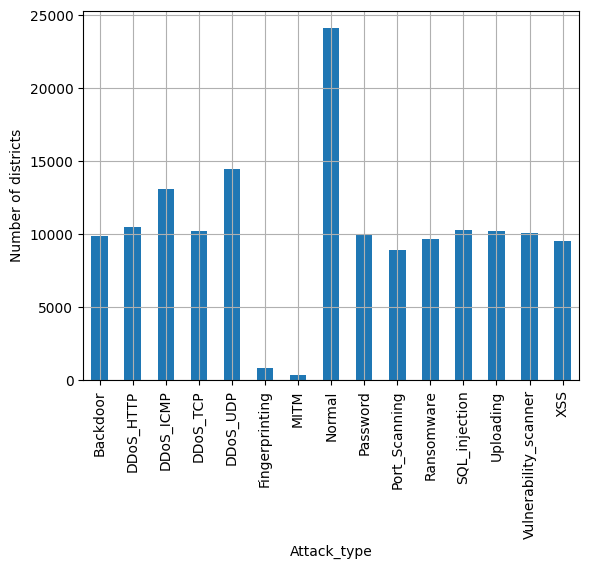

In [6]:
df["Attack_type"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Attack_type")
plt.ylabel("Number of districts")
plt.xticks(rotation=90)
# save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()
          

In [16]:
corr_matrix = df.corr(numeric_only=True)

In [18]:
corr_matrix["Attack_label"].sort_values(key=lambda x: abs(x), ascending=False)

Attack_label                                                                         1.000000
mqtt.hdrflags                                                                       -0.292882
mqtt.msgtype                                                                        -0.292882
mqtt.len                                                                            -0.273011
tcp.seq                                                                             -0.269861
mqtt.protoname-0                                                                     0.209794
mqtt.protoname-MQTT                                                                 -0.209794
mqtt.ver                                                                            -0.209794
mqtt.proto_len                                                                      -0.209794
mqtt.conflags                                                                       -0.209794
mqtt.conflag.cleansess                                      